In [1]:
import pandas as pd

df = pd.read_csv('D:/Tan Xin Yi/FYP/embedding_summary.csv')
df

,Ori Text,Tokens,Input IDs,Label,Summary_BERT_Embeddings
0,good quality dog food,"['good', 'quality', 'dog', 'food']","[2204, 3737, 3899, 2833]",2,[-4.14875686e-01 3.37523185e-02 -3.89436334e-...
1,not as advertised,"['not', 'as', 'advertised']","[2025, 2004, 17099]",0,[-2.26001263e-01 -3.06551568e-02 7.76034296e-...
2,"""delight"" says it all","['""', 'delight', '""', 'says', 'it', 'all']","[1000, 12208, 1000, 2758, 2009, 2035]",2,[-9.95922908e-02 2.56192565e-01 3.09855282e-...
3,cough medicine,"['cough', 'medicine']","[19340, 4200]",0,[-1.41757071e-01 4.46029454e-01 -6.04918301e-...
4,great taffy,"['great', 'ta', '##ffy']","[2307, 11937, 16329]",2,[-2.58984021e-03 2.73739278e-01 9.80741531e-...
...,...,...,...,...,...
393555,will not do without,"['will', 'not', 'do', 'without']","[2097, 2025, 2079, 2302]",2,[-1.33145019e-01 1.98499441e-01 -9.49988812e-...
393556,disappointed,['disappointed'],[9364],0,[-5.44347987e-02 2.18484789e-01 -4.92277481e-...
393557,perfect for our maltipoo,"['perfect', 'for', 'our', 'mal', '##tip', '##oo']","[3819, 2005, 2256, 15451, 25101, 9541]",2,[-1.48791477e-01 -5.62810749e-02 4.57164571e-...
393558,favorite training and reward treat,"['favorite', 'training', 'and', 'reward', 'tre...","[5440, 2731, 1998, 10377, 7438]",2,[-8.59797746e-02 -1.98572636e-01 -3.76347512e-...


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Function to clean and parse the BERT output
def parse_bert_output(text):
    # Replace newlines with spaces and strip extra spaces
    cleaned_text = text.replace('\n', ' ').strip()
    # Convert space-separated values into a list of floats
    numbers = list(map(float, cleaned_text.strip("[]").split()))
    return np.array(numbers, dtype=np.float32)

# Apply the function to each row of the 'Summary_BERT_Embeddings' column
df['Summary_BERT_Embeddings'] = df['Summary_BERT_Embeddings'].apply(parse_bert_output)

# Verify by printing the first few rows of the cleaned embeddings
print(df['Summary_BERT_Embeddings'].head())

# import numpy as np
# from sklearn.model_selection import train_test_split

# def parse_bert_output(text):
#     # Convert space-separated values into a list of floats
#     numbers = list(map(float, text.strip("[]").split()))
#     return np.array(numbers, dtype=np.float32)

# df['Summary_BERT_Embeddings'] = df['Summary_BERT_Embeddings'].apply(parse_bert_output)
# print(df['Summary_BERT_Embeddings'])


0    [-0.4148757, 0.03375232, -0.38943633, -0.03810...
1    [-0.22600126, -0.030655157, 0.07760343, -0.105...
2    [-0.09959229, 0.25619256, 0.30985528, -0.10262...
3    [-0.14175707, 0.44602945, -0.6049183, -0.23576...
4    [-0.0025898402, 0.27373928, 0.009807415, 0.000...
Name: Summary_BERT_Embeddings, dtype: object


In [3]:
df['Summary_BERT_Embeddings'] = df['Summary_BERT_Embeddings'].apply(lambda x: np.array(x, dtype=np.float32))
print(type(df['Summary_BERT_Embeddings'].iloc[0]))  
print(len(df['Summary_BERT_Embeddings'].iloc[0]))
print(df['Summary_BERT_Embeddings'].iloc[0])

<class 'numpy.ndarray'>
768
[-4.14875686e-01  3.37523185e-02 -3.89436334e-01 -3.81027535e-02
  2.20841318e-01 -1.20567791e-01 -8.91996995e-02  9.46829855e-01
 -3.77092123e-01 -9.56801847e-02 -2.07350090e-01  1.52011272e-02
  2.33732443e-02  4.43412900e-01 -3.08163345e-01 -1.21306233e-01
 -3.41100276e-01  5.26134491e-01  4.97683585e-01  9.57903713e-02
  1.90150738e-01 -7.07996547e-01 -5.30147672e-01  5.18257976e-01
  6.07615113e-01  1.11439034e-01  3.81327868e-02  3.50843191e-01
  9.55647156e-02 -1.46064013e-01  2.05032542e-01  5.45971096e-01
 -6.18045390e-01  5.15570268e-02  6.03542447e-01 -1.92136660e-01
  8.85000288e-01 -2.16159999e-01 -2.15622738e-01  1.98452309e-01
  2.05976255e-02  6.70039654e-01  8.12989771e-01 -2.34922051e-01
  1.82657450e-01 -5.11956453e-01 -2.36430717e+00 -2.10197315e-01
 -7.57313073e-02 -5.71688712e-01  3.91145974e-01 -4.04318944e-02
 -7.36760348e-02  2.68784761e-01  6.40684307e-01  7.68291831e-01
 -2.27538764e-01  2.58935362e-01  2.50525087e-01  1.03801453e+

In [4]:
df.dtypes

Ori Text                   object
Tokens                     object
Input IDs                  object
Label                       int64
Summary_BERT_Embeddings    object
dtype: object

In [5]:
# Convert BERT_Text (assumed to be a list of embeddings) into a NumPy array
X = np.vstack(df['Summary_BERT_Embeddings'].values)
y = df['Label'].values  # Target labels

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled.shape)

(920238, 768)
(920238,)


In [7]:
import pandas as pd

sentiment_counts = pd.Series(y_resampled).value_counts()

print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
2    306746
0    306746
1    306746
Name: count, dtype: int64


In [8]:
# Split into train and test sets
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(X_train_70.shape)
print(X_test_30.shape)
print(y_train_70.shape)
print(y_test_30.shape)

(644166, 768)
(276072, 768)
(644166,)
(276072,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_70, y_train_70)

y_pred_lr = lr_model.predict(X_test_30)

accuracy = accuracy_score(y_test_30, y_pred_lr)
precision = precision_score(y_test_30, y_pred_lr, average='weighted')
recall = recall_score(y_test_30, y_pred_lr, average='weighted')
f1 = f1_score(y_test_30, y_pred_lr, average='weighted')

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-Score: {f1:}")

# Print a classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test_30, y_pred_lr))


Accuracy: 0.6984663421136516
Precision: 0.6966542691011093
Recall: 0.6984663421136516
F1-Score: 0.6970854534630297

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70     92024
           1       0.63      0.59      0.61     92024
           2       0.77      0.78      0.78     92024

    accuracy                           0.70    276072
   macro avg       0.70      0.70      0.70    276072
weighted avg       0.70      0.70      0.70    276072



In [11]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_70, y_train_70)

y_pred_xgb = xgb_model.predict(X_test_30)

accuracy = accuracy_score(y_test_30, y_pred_xgb)
precision = precision_score(y_test_30, y_pred_xgb, average='weighted')
recall = recall_score(y_test_30, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_30, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-Score: {f1:}")
# Evaluate the XGBoost model
print("\nXGBoost Classification Report:\n", classification_report(y_test_30, y_pred_xgb))

Accuracy: 0.7115027963719609
Precision: 0.7113210973113684
Recall: 0.7115027963719609
F1-Score: 0.7112971237263765

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71     92024
           1       0.65      0.63      0.64     92024
           2       0.79      0.78      0.79     92024

    accuracy                           0.71    276072
   macro avg       0.71      0.71      0.71    276072
weighted avg       0.71      0.71      0.71    276072



In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_70, y_train_70)

y_pred_knn = knn_model.predict(X_test_30)

print("KNN:")
print(f"Accuracy: {accuracy_score(y_test_30, y_pred_knn)}")
print(f"Precision: {precision_score(y_test_30, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test_30, y_pred_knn, average='weighted')}")
print(f"F1-Score: {f1_score(y_test_30, y_pred_knn, average='weighted')}")
print(classification_report(y_test_30, y_pred_knn))


KNN:
Accuracy: 0.8415196035816743
Precision: 0.8595797709192569
Recall: 0.8415196035816743
F1-Score: 0.8367719737022085
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     92024
           1       0.78      0.94      0.85     92024
           2       0.96      0.65      0.78     92024

    accuracy                           0.84    276072
   macro avg       0.86      0.84      0.84    276072
weighted avg       0.86      0.84      0.84    276072



In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_70, y_train_70)

y_pred_gb = gb_model.predict(X_test_30)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test_30, y_pred_gb)}")
print(f"Precision: {precision_score(y_test_30, y_pred_gb, average='weighted')}")
print(f"Recall: {recall_score(y_test_30, y_pred_gb, average='weighted')}")
print(f"F1-Score: {f1_score(y_test_30, y_pred_gb, average='weighted')}")
print(classification_report(y_test_30, y_pred_gb))


Gradient Boosting:
Accuracy: 0.6871576979918282
Precision: 0.6871352093865878
Recall: 0.6871576979918282
F1-Score: 0.6870458568322922
              precision    recall  f1-score   support

           0       0.67      0.70      0.69     92024
           1       0.62      0.60      0.61     92024
           2       0.77      0.76      0.77     92024

    accuracy                           0.69    276072
   macro avg       0.69      0.69      0.69    276072
weighted avg       0.69      0.69      0.69    276072



In [12]:
import torch

print("Is CUDA available:", torch.cuda.is_available())
print("CUDA Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


Is CUDA available: True
CUDA Device Name: NVIDIA GeForce RTX 3090


In [13]:
import torch.nn as nn
import torch.optim as optim

# Define a Simple Neural Network Classifier on Top of BERT Embeddings
class BERT_Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(BERT_Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, embeddings):
        x = self.fc1(embeddings)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [14]:
from torch.utils.data import DataLoader, Dataset, TensorDataset, RandomSampler, SequentialSampler
from transformers import AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize Model
input_size = X_train_70.shape[1]  # Dimension of BERT embeddings
num_classes = len(np.unique(y))  # Number of sentiment classes
model = BERT_Classifier(input_size, num_classes)
model.to(device)


C:\Users\xinyi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BERT_Classifier(
  (fc1): Linear(in_features=768, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [15]:
X_train_tensor = torch.tensor(X_train_70, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_70, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_30, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_30, dtype=torch.long)
# Create PyTorch Dataset and DataLoader
batch_size = 32

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)


In [16]:
# Define Loss Function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)


In [17]:
# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/5, Loss: 0.6727, Accuracy: 0.6987
Epoch 2/5, Loss: 0.6095, Accuracy: 0.7339
Epoch 3/5, Loss: 0.5713, Accuracy: 0.7547
Epoch 4/5, Loss: 0.5412, Accuracy: 0.7718
Epoch 5/5, Loss: 0.5166, Accuracy: 0.7844
Test Accuracy: 0.7834


In [21]:
# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/10, Loss: 0.4964, Accuracy: 0.7944
Epoch 2/10, Loss: 0.4787, Accuracy: 0.8040
Epoch 3/10, Loss: 0.4634, Accuracy: 0.8108
Epoch 4/10, Loss: 0.4495, Accuracy: 0.8180
Epoch 5/10, Loss: 0.4371, Accuracy: 0.8240
Epoch 6/10, Loss: 0.4263, Accuracy: 0.8288
Epoch 7/10, Loss: 0.4163, Accuracy: 0.8336
Epoch 8/10, Loss: 0.4076, Accuracy: 0.8377
Epoch 9/10, Loss: 0.3994, Accuracy: 0.8410
Epoch 10/10, Loss: 0.3915, Accuracy: 0.8451
Test Accuracy: 0.8284


In [22]:
# Training Loop
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/15, Loss: 0.3848, Accuracy: 0.8480
Epoch 2/15, Loss: 0.3780, Accuracy: 0.8512
Epoch 3/15, Loss: 0.3722, Accuracy: 0.8538
Epoch 4/15, Loss: 0.3663, Accuracy: 0.8562
Epoch 5/15, Loss: 0.3612, Accuracy: 0.8583
Epoch 6/15, Loss: 0.3565, Accuracy: 0.8607
Epoch 7/15, Loss: 0.3513, Accuracy: 0.8622
Epoch 8/15, Loss: 0.3470, Accuracy: 0.8646
Epoch 9/15, Loss: 0.3426, Accuracy: 0.8664
Epoch 10/15, Loss: 0.3388, Accuracy: 0.8679
Epoch 11/15, Loss: 0.3351, Accuracy: 0.8694
Epoch 12/15, Loss: 0.3316, Accuracy: 0.8707
Epoch 13/15, Loss: 0.3279, Accuracy: 0.8723
Epoch 14/15, Loss: 0.3245, Accuracy: 0.8738
Epoch 15/15, Loss: 0.3219, Accuracy: 0.8750
Test Accuracy: 0.8486


In [23]:
# Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/20, Loss: 0.3186, Accuracy: 0.8766
Epoch 2/20, Loss: 0.3157, Accuracy: 0.8776
Epoch 3/20, Loss: 0.3127, Accuracy: 0.8790
Epoch 4/20, Loss: 0.3099, Accuracy: 0.8797
Epoch 5/20, Loss: 0.3071, Accuracy: 0.8811
Epoch 6/20, Loss: 0.3047, Accuracy: 0.8819
Epoch 7/20, Loss: 0.3023, Accuracy: 0.8830
Epoch 8/20, Loss: 0.3003, Accuracy: 0.8835
Epoch 9/20, Loss: 0.2979, Accuracy: 0.8848
Epoch 10/20, Loss: 0.2955, Accuracy: 0.8856
Epoch 11/20, Loss: 0.2935, Accuracy: 0.8868
Epoch 12/20, Loss: 0.2915, Accuracy: 0.8877
Epoch 13/20, Loss: 0.2891, Accuracy: 0.8885
Epoch 14/20, Loss: 0.2873, Accuracy: 0.8892
Epoch 15/20, Loss: 0.2855, Accuracy: 0.8901
Epoch 16/20, Loss: 0.2836, Accuracy: 0.8907
Epoch 17/20, Loss: 0.2821, Accuracy: 0.8913
Epoch 18/20, Loss: 0.2799, Accuracy: 0.8921
Epoch 19/20, Loss: 0.2783, Accuracy: 0.8930
Epoch 20/20, Loss: 0.2765, Accuracy: 0.8938
Test Accuracy: 0.8626


In [24]:
# Evaluation
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        X_batch, y_batch = batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = y_batch.cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(labels)


In [25]:
# Classification Report
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy:}")
print("Classification Report:\n", classification_report(true_labels, predictions))

Test Accuracy: 0.8626227940537251
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     92024
           1       0.84      0.85      0.85     92024
           2       0.89      0.87      0.88     92024

    accuracy                           0.86    276072
   macro avg       0.86      0.86      0.86    276072
weighted avg       0.86      0.86      0.86    276072



In [26]:
pip install seaborn


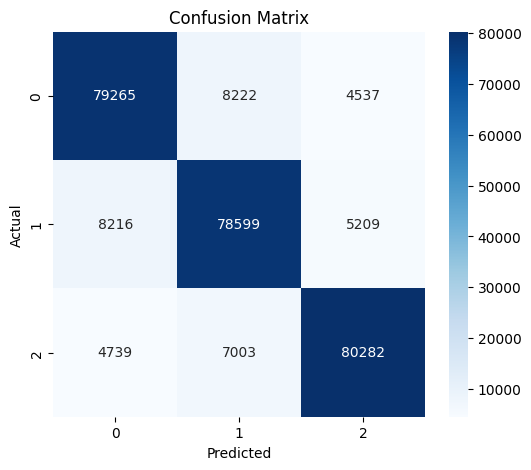

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# text = "This restaurant is amazing!"
# inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
# output = model(**inputs)
# print(torch.argmax(output.logits, dim=1).item())  # Prints class index
